# Simulation plot
Notebook to produce Figure 4.

In [1]:
import matplotlib.pyplot as plt

In [2]:
def read_csv(path):
    simulations = []
    lines = []
    with open(path) as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]
    lines = [line for line in lines if "##" not in line]
    lines.pop(0)
    x = []
    y = []
    current_x = []
    current_y = []
    current_simulation = []
    for line in lines:
        if "#" in line:
            current_x.append(30)
            current_y.append(current_y[-1])
            x.append(current_x)
            y.append(current_y)
            current_x = []
            current_y = []
        else:
            current_x.append(float(line.split(",")[0]))
            current_y.append(float(line.split(",")[1]))
    return x,y

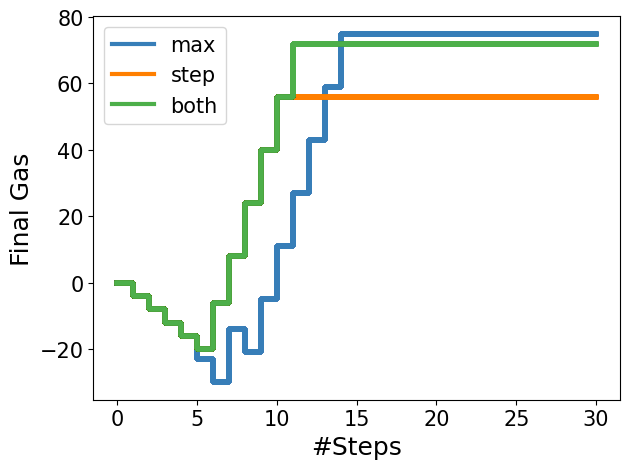

In [3]:
x_max,y_max = read_csv("../out/simulations/max.csv")
x_step, y_step = read_csv("../out/simulations/step.csv")
x_both, y_both = read_csv("../out/simulations/both.csv")
plt.rcParams["figure.autolayout"] = True
for x, y, label, c in [(x_max, y_max, "max", "#377eb8"), (x_step, y_step, "step", "#ff7f00"), (x_both, y_both, "both", "#4daf4a")]:
    for i in range(len(x)):
        if i == len(x)-1:
            plt.plot(x[i],y[i], c = c, linewidth = 3, label = label)
        else:
            plt.plot(x[i],y[i], c = c, linewidth = 3)
#plt.yticks(np.arange(min(x), max(x)+1, 1.0))
plt.legend(fontsize = 15)
plt.xlabel("#Steps",  fontsize=18)
plt.ylabel("Final Gas",  fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("../out/simulation.png", dpi = 300)
plt.show()